<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/LogisticRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Test Accuracy: 100.00%


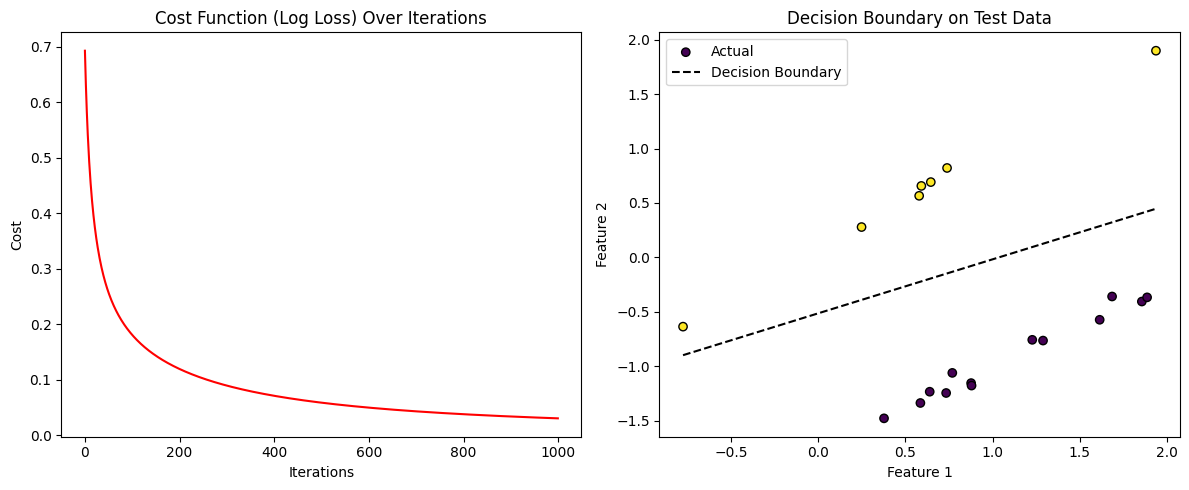

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class LogisticRegression:
    def __init__(self, lr=0.01, iterations=1000):
        self.lr = lr
        self.iterations = iterations
        self.weights = None
        self.bias = 0
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        # import ipdb
        # ipdb.set_trace()
        for _ in range(self.iterations):
            # 1. Forward Pass
            model_linear = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(model_linear)

            # 2. Compute Cost (Log Loss)
            cost = - (1/n_samples) * np.sum(y * np.log(predictions + 1e-9) + (1-y) * np.log(1-predictions + 1e-9))
            self.costs.append(cost)

            # 3. Backward Pass (Gradients)
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            # 4. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]


# 1. Generate Synthetic Data
# 100 samples, 2 features (so we can plot them), 1 class per cluster
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0,
                           n_informative=2, random_state=42, n_clusters_per_class=1)

# Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Initialize and Train the Model
model = LogisticRegression(lr=0.1, iterations=1000)
model.fit(X_train, y_train)

# 3. Evaluate Predictions
predictions = model.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# 4. Visualization
plt.figure(figsize=(12, 5))

# Plot 1: Cost Function Convergence
plt.subplot(1, 2, 1)
plt.plot(range(len(model.costs)), model.costs, color='red')
plt.title("Cost Function (Log Loss) Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Plot 2: Decision Boundary
plt.subplot(1, 2, 2)
# Scatter plot of test data
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', label='Actual')

# Calculate the boundary line: w1*x1 + w2*x2 + b = 0  => x2 = -(w1*x1 + b) / w2
x1_values = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 100)
x2_values = -(model.weights[0] * x1_values + model.bias) / model.weights[1]

plt.plot(x1_values, x2_values, label='Decision Boundary', color='black', linestyle='--')
plt.title("Decision Boundary on Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

plt.tight_layout()
plt.show()
